
Found 6525 images belonging to 25 classes.


Model architecture loaded.
Weights loaded.

204/204 [==============================] - 24s 116ms/step
Confusion Matrix:
 [[261   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0  69   0   0   0 102   0   1   0   0   2   0   5   0   0   0   0   0
    0   0   0   0  14   0  68]
 [  0   0  87   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  66 108   0   0   0]
 [  0   0   0 209   0   0  52   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   3 195   0   0   0   0   0  32   0   0   0   0   4   0   0
    0   0   0  27   0   0   0]
 [  0   0  27   0   0 118   1  12   0   0   1   0  10   0   0   0   0   0
    0   0   0   1  33  45  13]
 [  0   0  39  25   0   1 103   0   0   0  39   0   9   0   0   0   0   0
    0   0  16  29   0   0   0]
 [  0   0   0   0   0   0   0 261   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   

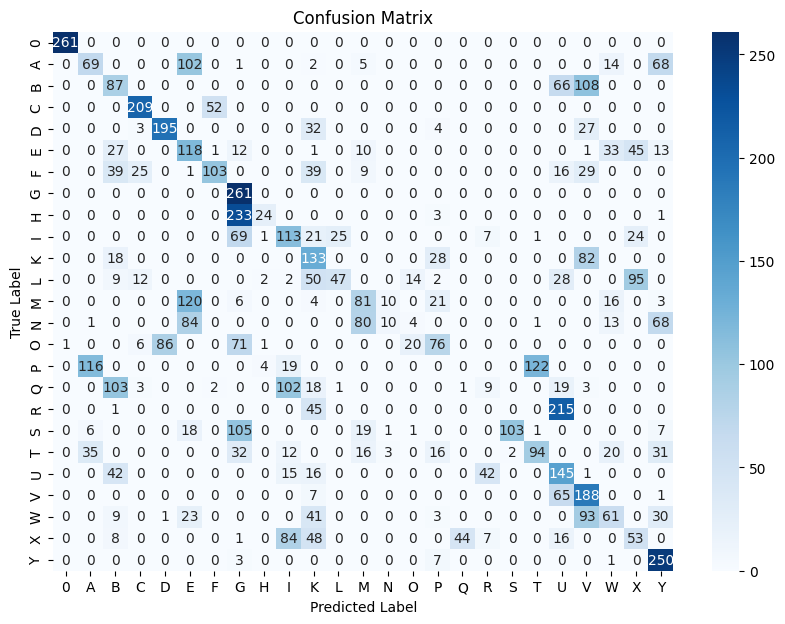

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved model-new
# model = tf.keras.models.load_model
# ('C:/Users/lenovo/Downloads/Sign-Language-To-Text-Conversion-main - Copy/Sign-Language-To-Text-Conversion-main/Models/model_new.h5')

# Assuming `test_set` is loaded or generated from your test dataset directory
# Load the test data using ImageDataGenerator (as you did in training)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming your test data is in a directory called 'test_data'
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory('C:/Users/lenovo/Downloads/slr - Copy/dataSet/testingData',
                                            target_size = (128, 128),                                  
                                            batch_size = 32,        
                                            color_mode = 'grayscale',
                                            class_mode = 'categorical',
                                            shuffle=False)


from tensorflow.keras.models import model_from_json

# Step 1: Load the model architecture from the JSON file
with open('C:/Users/lenovo/Downloads/slr - Copy/Models/model_new.json', 'r') as json_file:
    model_json = json_file.read()

model = model_from_json(model_json)
print("Model architecture loaded.")

# Step 2: Load the weights into the model
model.load_weights('C:/Users/lenovo/Downloads/slr - Copy/Models/model_new.h5')
print("Weights loaded.")

# Step 3: Compile the model before making predictions
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Predict probabilities for the test set
y_pred_prob = model.predict(test_set)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Get true class labels from the test set
y_true_classes = test_set.classes

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
